In [235]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [236]:
data_path = 'sensor_readings_24.data'
df = pd.read_csv(data_path)
# Features estão nas colunas, exceto a última
X = df.iloc[:, :-1].values
# Label presente na última coluna
y = df.iloc[:, -1].values
print(X)

[[0.438 0.498 3.625 ... 0.444 0.443 0.429]
 [0.438 0.498 3.625 ... 0.444 0.446 0.429]
 [0.437 0.501 3.625 ... 0.444 0.444 0.429]
 ...
 [0.937 5.    4.034 ... 5.    5.    1.105]
 [0.945 4.052 4.052 ... 5.    5.    1.118]
 [0.95  4.066 5.    ... 5.    5.    1.168]]


# Primeira Questão

## Primeiro Metódo

In [237]:
def mcov1(X):
    # X é uma matriz de dimensão N x p, onde N é o número de amostras e p é o número de variáveis
    N, p = X.shape
    # m é a média de cada coluna
    m = np.mean(X, axis=0)
    # Inicializa a matriz de covariância
    soma = np.zeros((p, p))
    for j in range(N):
            # aux é a diferença entre a j-ésima amostra e a média
            # Reshape para garantir que aux seja uma matriz coluna
            aux = X[j, :].reshape(p,1) - m.reshape(p,1)
            soma += aux @ aux.T

    C = soma / N
    
    return C

C1 = mcov1(X)
print(C1)

[[ 0.64429378  0.25774343  0.14109919  0.06112554  0.02183335 -0.11725092
  -0.32221198 -0.17313098 -0.3326806  -0.2933401  -0.23037136 -0.23598585
  -0.17755227 -0.27982877 -0.18690922  0.05793543  0.10394279  0.11645266
   0.17023967  0.16622908  0.19983476  0.43077107  0.39652127  0.43242752]
 [ 0.25774343  1.98789812  0.56864023  0.30214911  0.28285058  0.08784358
  -0.10914603 -0.01353742 -0.10068077 -0.17052749 -0.42862975 -0.25911075
  -0.40933036 -0.26393574 -0.14894677 -0.04912134 -0.08585944 -0.04149665
   0.04655638  0.11692279  0.06652167 -0.00402519  0.10491815  0.17001914]
 [ 0.14109919  0.56864023  1.55585663  0.64769991  0.55047114  0.25758459
  -0.12896883 -0.25851141 -0.37231202 -0.29218848 -0.2708856  -0.36619736
  -0.32008489 -0.31900322 -0.28527856 -0.02700165 -0.08124026 -0.11426119
  -0.09074583 -0.00918973 -0.01109068  0.25563067  0.18116124  0.1094225 ]
 [ 0.06112554  0.30214911  0.64769991  1.71431308  1.09880567  0.52951466
  -0.12606044 -0.18621779 -0.300920

## Segundo Metódo

In [238]:
def mcov2(X):
    N, p = X.shape
    m = np.mean(X, axis=0)
    aux = X - m
    C = aux.T @ aux

    return C/N

C2 = mcov2(X)
print(C2)

[[ 0.64429378  0.25774343  0.14109919  0.06112554  0.02183335 -0.11725092
  -0.32221198 -0.17313098 -0.3326806  -0.2933401  -0.23037136 -0.23598585
  -0.17755227 -0.27982877 -0.18690922  0.05793543  0.10394279  0.11645266
   0.17023967  0.16622908  0.19983476  0.43077107  0.39652127  0.43242752]
 [ 0.25774343  1.98789812  0.56864023  0.30214911  0.28285058  0.08784358
  -0.10914603 -0.01353742 -0.10068077 -0.17052749 -0.42862975 -0.25911075
  -0.40933036 -0.26393574 -0.14894677 -0.04912134 -0.08585944 -0.04149665
   0.04655638  0.11692279  0.06652167 -0.00402519  0.10491815  0.17001914]
 [ 0.14109919  0.56864023  1.55585663  0.64769991  0.55047114  0.25758459
  -0.12896883 -0.25851141 -0.37231202 -0.29218848 -0.2708856  -0.36619736
  -0.32008489 -0.31900322 -0.28527856 -0.02700165 -0.08124026 -0.11426119
  -0.09074583 -0.00918973 -0.01109068  0.25563067  0.18116124  0.1094225 ]
 [ 0.06112554  0.30214911  0.64769991  1.71431308  1.09880567  0.52951466
  -0.12606044 -0.18621779 -0.300920

## Terceiro Metódo

In [239]:
def mcov3(X):
    N, p = X.shape
    m = np.mean(X, axis=0)
    R = np.zeros((p, p))
    for j in range (N):
        R = R + X[j, :].reshape(p, 1) @ X[j, :].reshape(p, 1).T
    
    m2 = m.reshape(p,1)
    C = R/N - m2@m2.T
    return C

C3 = mcov3(X)
print(C3)


[[ 0.64429378  0.25774343  0.14109919  0.06112554  0.02183335 -0.11725092
  -0.32221198 -0.17313098 -0.3326806  -0.2933401  -0.23037136 -0.23598585
  -0.17755227 -0.27982877 -0.18690922  0.05793543  0.10394279  0.11645266
   0.17023967  0.16622908  0.19983476  0.43077107  0.39652127  0.43242752]
 [ 0.25774343  1.98789812  0.56864023  0.30214911  0.28285058  0.08784358
  -0.10914603 -0.01353742 -0.10068077 -0.17052749 -0.42862975 -0.25911075
  -0.40933036 -0.26393574 -0.14894677 -0.04912134 -0.08585944 -0.04149665
   0.04655638  0.11692279  0.06652167 -0.00402519  0.10491815  0.17001914]
 [ 0.14109919  0.56864023  1.55585663  0.64769991  0.55047114  0.25758459
  -0.12896883 -0.25851141 -0.37231202 -0.29218848 -0.2708856  -0.36619736
  -0.32008489 -0.31900322 -0.28527856 -0.02700165 -0.08124026 -0.11426119
  -0.09074583 -0.00918973 -0.01109068  0.25563067  0.18116124  0.1094225 ]
 [ 0.06112554  0.30214911  0.64769991  1.71431308  1.09880567  0.52951466
  -0.12606044 -0.18621779 -0.300920

## Quarto Metódo

In [240]:
def mcov4(X):
    N, p = X.shape
    m = np.mean(X, axis=0)
    R = (X.T @ X)/N
    C = R - m.reshape(p,1)@m.reshape(p,1).T
    return C

C4 = mcov4(X)
print(C4)

[[ 0.64429378  0.25774343  0.14109919  0.06112554  0.02183335 -0.11725092
  -0.32221198 -0.17313098 -0.3326806  -0.2933401  -0.23037136 -0.23598585
  -0.17755227 -0.27982877 -0.18690922  0.05793543  0.10394279  0.11645266
   0.17023967  0.16622908  0.19983476  0.43077107  0.39652127  0.43242752]
 [ 0.25774343  1.98789812  0.56864023  0.30214911  0.28285058  0.08784358
  -0.10914603 -0.01353742 -0.10068077 -0.17052749 -0.42862975 -0.25911075
  -0.40933036 -0.26393574 -0.14894677 -0.04912134 -0.08585944 -0.04149665
   0.04655638  0.11692279  0.06652167 -0.00402519  0.10491815  0.17001914]
 [ 0.14109919  0.56864023  1.55585663  0.64769991  0.55047114  0.25758459
  -0.12896883 -0.25851141 -0.37231202 -0.29218848 -0.2708856  -0.36619736
  -0.32008489 -0.31900322 -0.28527856 -0.02700165 -0.08124026 -0.11426119
  -0.09074583 -0.00918973 -0.01109068  0.25563067  0.18116124  0.1094225 ]
 [ 0.06112554  0.30214911  0.64769991  1.71431308  1.09880567  0.52951466
  -0.12606044 -0.18621779 -0.300920

## Função nativa do Python

In [241]:
# A flag bias=True indica que estamos calculando a covariância com N como divisor
# O padrão é bias=False, que divide por N-1
Cref = np.cov(X, rowvar=False, bias=True)
Cmy = mcov4(X)
E  = Cmy - Cref
print(E)

[[-1.11022302e-15  1.11022302e-16  2.38697950e-15  9.43689571e-16
  -7.52869989e-16 -1.62370117e-15 -1.44328993e-15  1.11022302e-16
   2.66453526e-15  9.43689571e-16  6.93889390e-16 -1.05471187e-15
  -1.11022302e-15 -1.66533454e-16 -3.05311332e-16 -4.71844785e-16
  -5.55111512e-16 -3.33066907e-16 -2.49800181e-16 -1.66533454e-16
  -1.94289029e-16  9.43689571e-16 -1.11022302e-15  9.43689571e-16]
 [ 1.11022302e-16  7.32747196e-15  8.88178420e-16 -1.49880108e-15
   2.55351296e-15  1.74860126e-15 -1.59594560e-15 -6.52256027e-16
  -1.24900090e-15  1.55431223e-15  2.77555756e-16 -6.10622664e-16
  -5.55111512e-17 -1.38777878e-15 -5.55111512e-17  1.45716772e-16
   2.77555756e-16 -6.17561557e-16 -1.80411242e-16  2.77555756e-17
  -6.66133815e-16  2.38524478e-16  1.23512311e-15  2.77555756e-17]
 [ 2.38697950e-15  8.88178420e-16  4.44089210e-15  6.66133815e-16
   3.33066907e-16 -9.99200722e-16 -3.13638004e-15 -8.32667268e-16
   0.00000000e+00  3.33066907e-16  3.60822483e-15  8.88178420e-16
  -1.665

# Segunda Questão

## Análise númerica do melhor tempo

In [242]:
metodos = {
    "Metodo 1": mcov1,
    "Metodo 2": mcov2,
    "Metodo 3": mcov3,
    "Metodo 4": mcov4,
    # lambda é necessário para passar a função np.cov 
    "Metodo Nativo": lambda d: np.cov(X, rowvar=False, bias=True)   
}

n_rodadas = 100
resultados = {}

for nome_metodo, funcao_metodo in metodos.items():
    
    tempos_rodada = [] 
    
    for i in range(n_rodadas):
        # time.perf_counter() é usado para medir o tempo de execução
        start_time = time.perf_counter() 
        
        # Executa a função de covariância
        funcao_metodo(X)
        
        end_time = time.perf_counter() 
        
        # Guarda o tempo decorrido
        tempos_rodada.append(end_time - start_time)
        
    # Armazena a lista de tempos para este método
    resultados[nome_metodo] = tempos_rodada

for nome_metodo, tempos in resultados.items():
    tempo_medio = np.mean(tempos)
    # Calcula o desvio-padrão dos tempos
    desvio_padrao = np.std(tempos)
    
    print(f"\nResultados do '{nome_metodo}':")
    print(f"    Tempo Médio de Execução: {tempo_medio:.6f} segundos")
    print(f"    Desvio-Padrão: {desvio_padrao:.6f} segundos")
    



Resultados do 'Metodo 1':
    Tempo Médio de Execução: 0.021256 segundos
    Desvio-Padrão: 0.002182 segundos

Resultados do 'Metodo 2':
    Tempo Médio de Execução: 0.000307 segundos
    Desvio-Padrão: 0.000025 segundos

Resultados do 'Metodo 3':
    Tempo Médio de Execução: 0.017916 segundos
    Desvio-Padrão: 0.000674 segundos

Resultados do 'Metodo 4':
    Tempo Médio de Execução: 0.000225 segundos
    Desvio-Padrão: 0.000024 segundos

Resultados do 'Metodo Nativo':
    Tempo Médio de Execução: 0.000372 segundos
    Desvio-Padrão: 0.000046 segundos


## Histograma

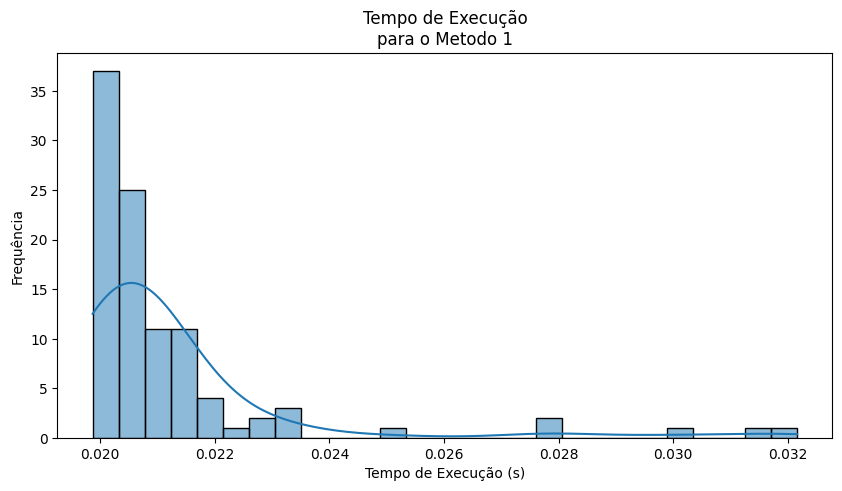

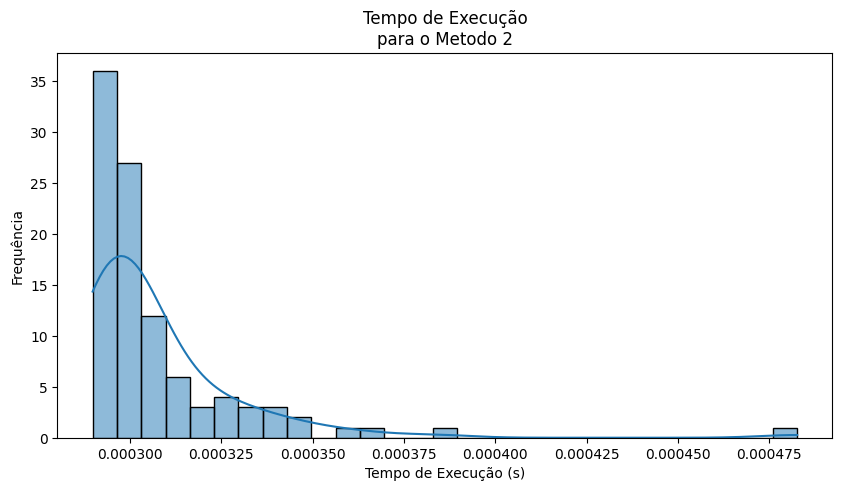

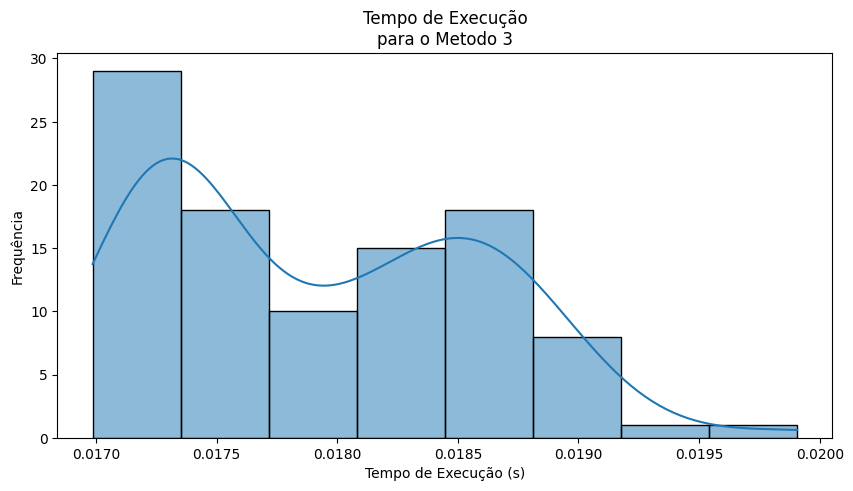

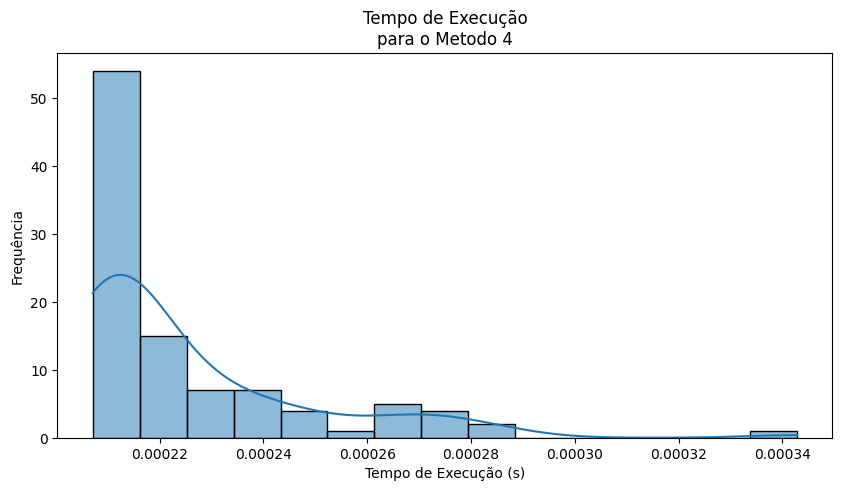

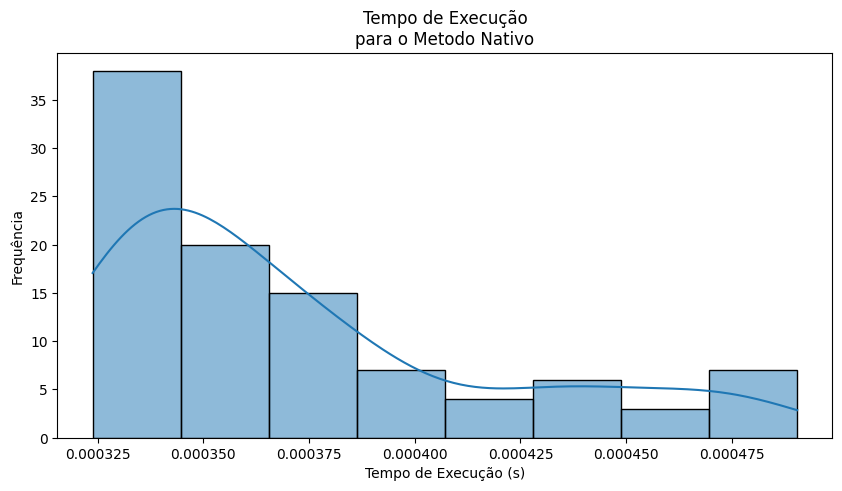

In [243]:
# Convertendo o dicionário para um DataFrame 
df_tempos = pd.DataFrame(resultados)

# Reformatando para o formato "longo" 
df_long = df_tempos.melt(var_name='Método', value_name='Tempo de Execução (s)')

for metodo in df_tempos.columns:
    plt.figure(figsize=(10, 5)) 
    sns.histplot(data=df_tempos, x=metodo, kde=True) # kde=True adiciona uma linha de densidade
    plt.title(f'Tempo de Execução\npara o {metodo}')
    plt.xlabel('Tempo de Execução (s)')
    plt.ylabel('Frequência')
    plt.show()

## Violin-plot

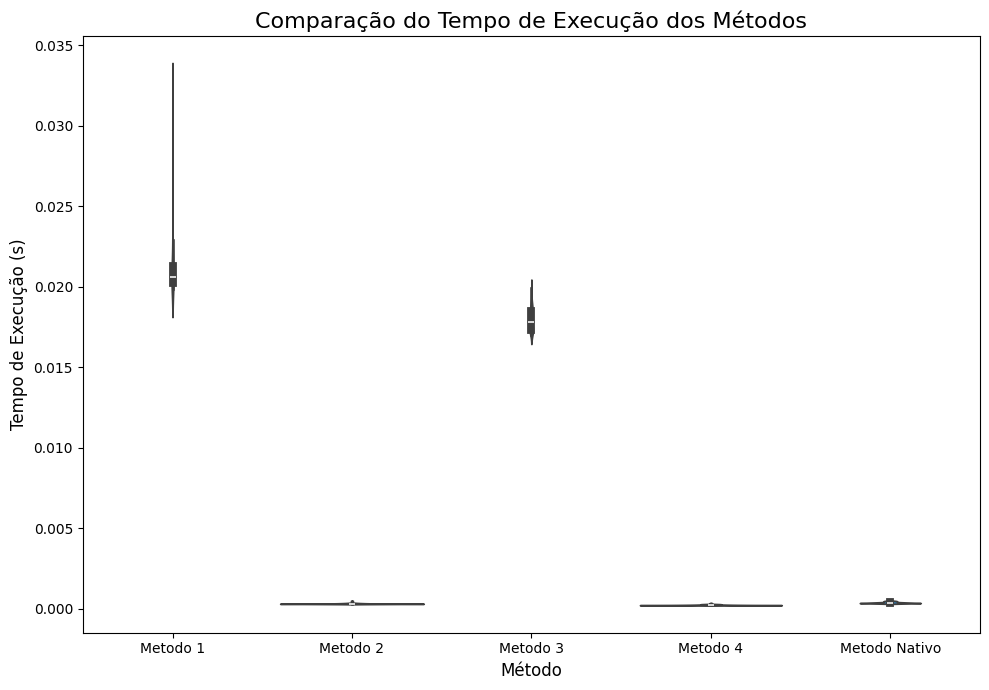

In [ ]:
plt.figure(figsize=(10, 7))

sns.violinplot(data=df_long, x='Método', y='Tempo de Execução (s)')

plt.yscale('log')

plt.title('Comparação do Tempo de Execução dos Métodos', fontsize=16)
plt.xlabel('Método', fontsize=12)
plt.ylabel('Tempo de Execução (s)', fontsize=12)
plt.tight_layout() 
plt.show()

# Terceira Questão

## Cálculos de matrizes

In [245]:
# O metódo mais rápido é o segundo 
# Matriz de covariância global
C_global = mcov2(X)

# Matriz de covariância por classe
classes_separadas = np.unique(y)
matrizes_por_classe = {}

for classe in classes_separadas:
    # Filtra os dados pertencentes à classe atual
    X_classe = X[y == classe]

    matrizes_por_classe[classe] = mcov2(X_classe)

# Exibe as matrizes de covariância por classe
for classe, matriz in matrizes_por_classe.items():
    print(f"Matriz de Covariância para a Classe {classe}:\n{matriz}\n") 

Matriz de Covariância para a Classe Move-Forward:
[[ 5.90616566e-01  2.33086286e-01  1.79221054e-01  2.12299086e-01
   1.91924368e-01  1.39040440e-02 -2.61491413e-01 -9.82943327e-02
  -2.38249780e-01 -1.99513998e-01 -1.09323817e-01 -1.99365842e-01
  -1.11637307e-01 -2.41630962e-01 -2.36439042e-01  9.39047007e-02
   7.54592510e-02  1.19520844e-01  1.41471592e-01  5.08172019e-02
   1.15638821e-01  4.53423620e-01  3.20477636e-01  2.86846713e-01]
 [ 2.33086286e-01  2.17652979e+00  5.73468656e-01  3.27984831e-01
   2.72257938e-01  4.08070274e-02  3.02412451e-03  1.73430789e-01
   6.01293748e-02 -5.39622048e-02 -3.41181222e-01 -4.17597465e-01
  -6.19677975e-01 -5.00063538e-01 -1.95422607e-01 -2.24237528e-02
  -4.26616196e-02  2.07617751e-03  1.79890215e-01  1.09828966e-01
   6.53059364e-02 -3.36300664e-02  1.49211338e-01  1.55797965e-01]
 [ 1.79221054e-01  5.73468656e-01  1.35125245e+00  3.59880460e-01
   3.39631081e-01 -9.11400956e-02 -1.61391304e-01 -1.29071540e-01
  -2.04070272e-01 -1.644

## Análise de invertibilidade

In [246]:
todas_as_matrizes = {'Global': C_global}
todas_as_matrizes.update(matrizes_por_classe)

print("\nAnálise de Invertibilidade e Condicionamento das Matrizes de Covariância")

print(f"\n{'Matriz':<18} | {'Posto':<5} | {'Condicionamento':<15}")


for nome, matriz in todas_as_matrizes.items():
    p = matriz.shape[0]
    posto = np.linalg.matrix_rank(matriz)
    num_cond = np.linalg.cond(matriz)
    
    print(f"{nome:<18} | {posto:<5} | {num_cond:<15.2e}")



Análise de Invertibilidade e Condicionamento das Matrizes de Covariância

Matriz             | Posto | Condicionamento
Global             | 24    | 2.05e+01       
Move-Forward       | 24    | 5.35e+01       
Sharp-Right-Turn   | 24    | 3.13e+01       
Slight-Left-Turn   | 24    | 1.73e+02       
Slight-Right-Turn  | 24    | 1.96e+02       


# Quarta Questão